Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s
Starting simulation at t=50. ms for a duration of 150. ms
150. ms (100%) simulated in < 1s


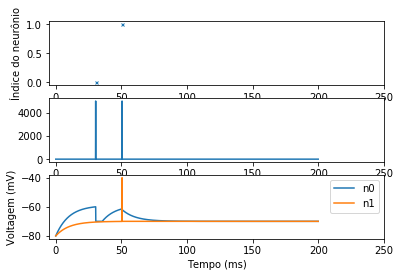

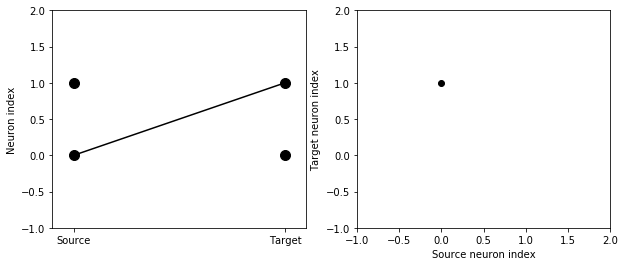

In [12]:
from brian2 import *
%matplotlib inline

N = 2 # número de neurônios
tau = 10*ms
vrest = -70.0*mV
R = 100*Mohm

#LIF Model
eqs = '''
    dv/dt = (-(v-vrest) + R*I)/tau : volt (unless refractory)
    I : amp
    '''
neurons = NeuronGroup(N, eqs, threshold = 'v > -60.0*mV', reset = 'v = vrest', refractory = 5*ms, method = 'linear')
neurons.v = [-80, -80]*mV
neurons.I = [110, 0]*pA #neurons.I = [110, 0]*pA
#neurons.I = 0*pA
#neurons[0:2].I = 120*pA


w = 30*mV
g = 4
syn_ex = Synapses(neurons, neurons, on_pre='v_post += w', delay = 20*ms)
#syn_in = Synapses(neurons, neurons, on_pre='v_post -= g*w', delay = 10*ms)
#syn = Synapses(neurons, neurons, on_pre='v_post += J', delay = 2*ms)
syn_ex.connect(i=0, j=1)
#syn_in.connect(i=1, j=2)
#syn.connect(i=[0, 1], j=[1, 2])

state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon = SpikeMonitor(neurons)
rate_mon = PopulationRateMonitor(neurons) # capturar a frequência instantânea da rede

run (50*ms, report = 'stdout')

neurons.I = [0, 0]*pA
run (150*ms, report = 'stdout')

#for l in range(10):
#    neurons.I[0] = l*25*pA
#    run(10*ms, report = 'stdout')


#print(spike_mon.count[0])

# Raster plot
subplot(311)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 3)
ylabel('Índice do neurônio')
xlim(-5, 250)

subplot(312)
plot(rate_mon.t/ms,rate_mon.rate/Hz)
xlim(-5, 250)

# Tensão de disparos
subplot(313)
plot(state_mon.t/ms, state_mon.v[0]/mV, label="n0")
plot(state_mon.t/ms, state_mon.v[1]/mV, label="n1")
#plot(state_mon.t/ms, state_mon.v[2]/mV, label="n2")
xlabel('Tempo (ms)')
ylabel('Voltagem (mV)')
xlim(-5, 250)
legend()
show()

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(syn_ex)
